# Introduction

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will explore this dataset and find out factors that contribute the most for diabetes causation. We will also build Machine Learning Models that can help to predict whether a person is diabetic or not and try to improve the model by performing Cross Validation and hyperparameter tuning.

 ## Load libraries and read the data

In [21]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')


In [30]:
var=pd.read_excel(r'E:\Odian School 9AM\Assignment DS16\Variables_diabetes_EDA.xlsx')
df=pd.read_excel(r'E:\Odian School 9AM\Assignment DS16\diabetes_mandatory_EDA.xlsx',names=var['Variables used'])
df

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
763,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
765,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    float64
 1   Glucose                     767 non-null    float64
 2   Blood Pressure              767 non-null    float64
 3   Skin Thickness              767 non-null    float64
 4   Insulin                     767 non-null    float64
 5   BMI                         767 non-null    float64
 6   Diabetes Pedigree Function  767 non-null    float64
 7   Age                         767 non-null    float64
 8   Outcome                     767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

What are the different types of diabetes? The most common types of diabetes are type 1, type 2, and gestational diabetes.

Type 1 diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

Type 2 diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

In [33]:
print("Number of rows present in the dataset are: ", df.shape)

Number of rows present in the dataset are:  (767, 9)


In [34]:
df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


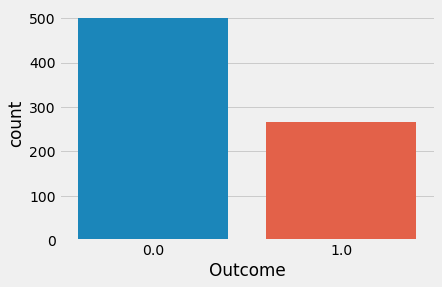

In [39]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()

In [40]:
df['Outcome'].value_counts()

0.0    500
1.0    267
Name: Outcome, dtype: int64

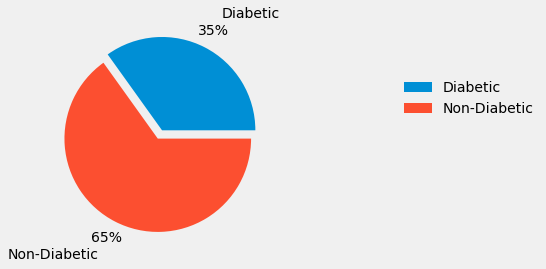

In [41]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

The distribution of the dependent variable is not skewed or imbalanced. We can move ahead with the same data without having to apply SMOTE or undersampling or oversampling techniques. But we do need to make that we distribution of the classes remain same when we split our data to train and test set.

Before we move ahead, we need to check what are the minimum values for each column, certain columns like Glucose or Insulin can not have values as 0. Therefore, we need to take care of such values.

In [42]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0.0
The minimum value fore the columns Glucose is 0.0
The minimum value fore the columns Blood Pressure is 0.0
The minimum value fore the columns Skin Thickness is 0.0
The minimum value fore the columns Insulin is 0.0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns Diabetes Pedigree Function is 0.078
The minimum value fore the columns Age is 21.0
The minimum value fore the columns Outcome is 0.0


Now out of the above columns having zero as their minima, only Pregnancie Column can take the values as zero, so what should do we do with those columns that have zero as their minimum even if they aren't supposed to?

### Null Values

In [45]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

There are no missing values.

### Exploratory Data Analysis

In this section, we will be doing some basic Exploratory Data Analysis to get the "feel" of the data, we will be checking the distributions, the correlations etc of the different columns and try to remove the null values present

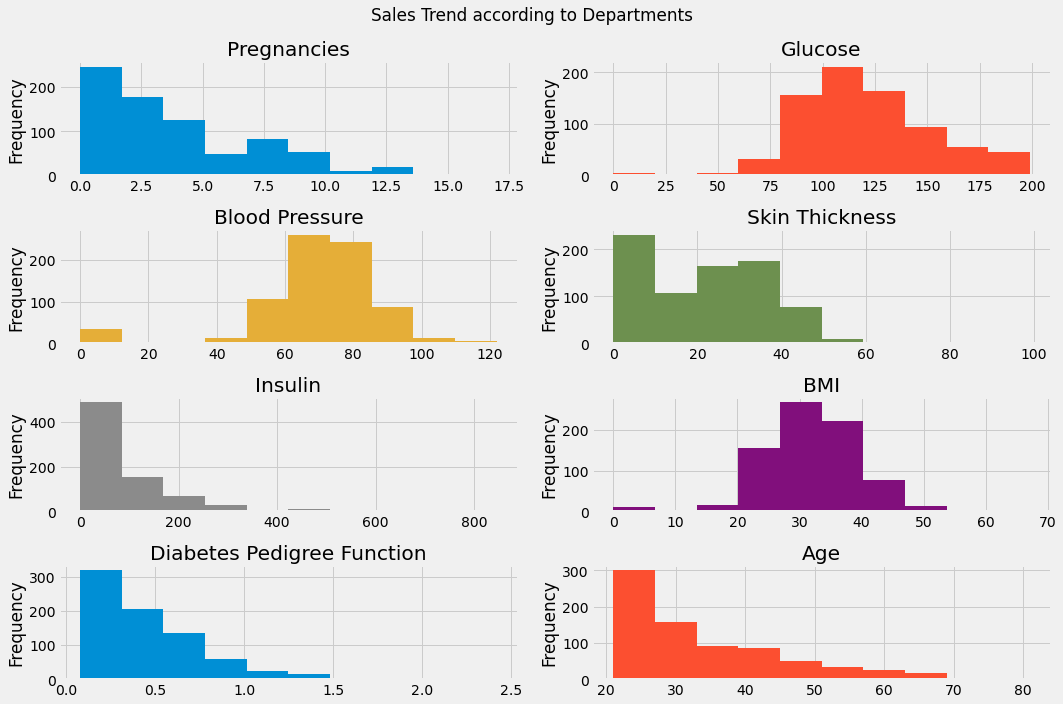

In [46]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Departments')
plt.tight_layout()
plt.show()

Let's check the skewness of each of the columns.

Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. The peak of the histogram represents the mode.

In [47]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9039762643556906
Skewness for the column Glucose is 0.17641236225612397
Skewness for the column Blood Pressure is -1.8419110171756354
Skewness for the column Skin Thickness is 0.11205768155480851
Skewness for the column Insulin is 2.2706301676870453
Skewness for the column BMI is -0.42795024761578393
Skewness for the column Diabetes Pedigree Function is 1.9211904511620606
Skewness for the column Age is 1.1351646947682954


Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI are not that much skewed.  We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.

In [48]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(df.groupby('Outcome').mean()[var])

In [49]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

### Pregnancies

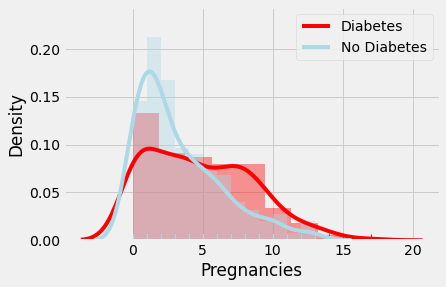

In [50]:
distplot('Pregnancies')

In [51]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0.0,3.298000
1.0,4.861423


We can see that the number of pregnancies is high for the diabetic people

### Insulin

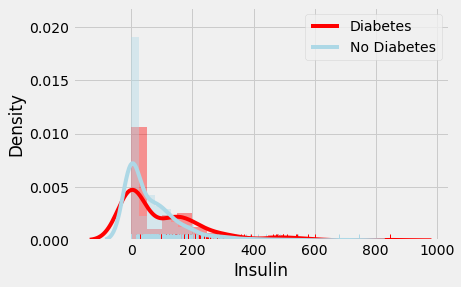

In [52]:
distplot('Insulin')

In [53]:
mean_target('Insulin')

,Insulin
Outcome,
0.0,68.79200
1.0,100.71161


Diabetic People tend to have more Insulin level.

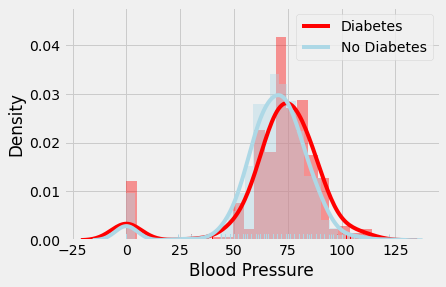

In [55]:
#BloodPressure
distplot('Blood Pressure')

In [57]:
mean_target('Blood Pressure')

,Blood Pressure
Outcome,
0.0,68.184000
1.0,70.820225


The mean of the blood pressure is greater for diabetic people as compared to the non-diabetic people

### Glucose

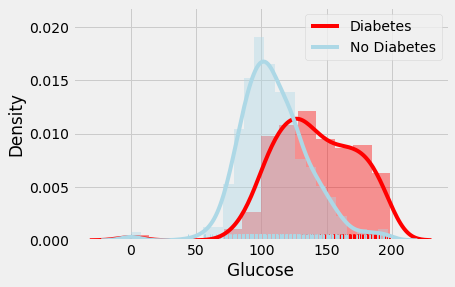

In [58]:
distplot('Glucose')

In [59]:
mean_target('Glucose')

,Glucose
Outcome,
0.0,109.98000
1.0,141.23221


Diabetic People tend to have much higher Glucose level

### Comman Man Analysis

Let's think like a common man, and analyze the data.

First, we would know what is the effect of Age on the Outcome because we have heard that as the age increases, the chances of diabetes also commonly increases.

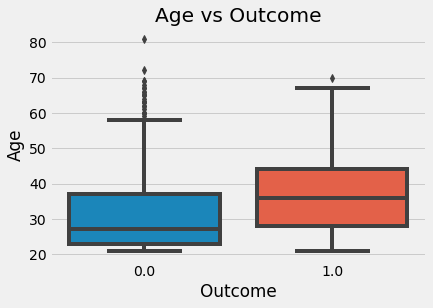

In [61]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

Yes, we were right, the median of the age of diabetic people is greater than that of non-diabetic people.

Let's also check the effect of Blood Pressure on the Outcome.

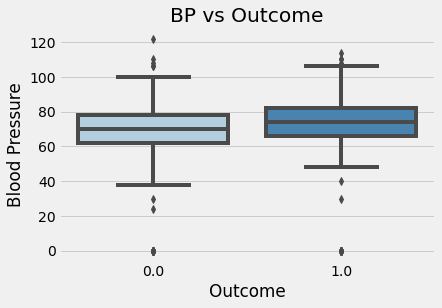

In [63]:
sns.boxplot(x = 'Outcome', y = 'Blood Pressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.

The next thing a common man would check is the relationship between age and BP

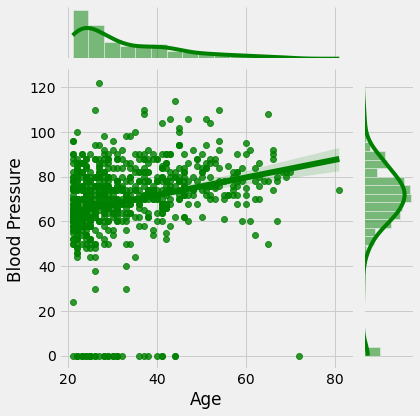

In [64]:
sns.jointplot(x='Age',y='Blood Pressure', data=df, kind = 'reg', color = 'green')

Hmm, as the age increases, generally the Blood Pressure also increases

One would also want to know the chances of getting diabetes, if it is common in the family. We can check that with the Diabetes Pedigree Function.

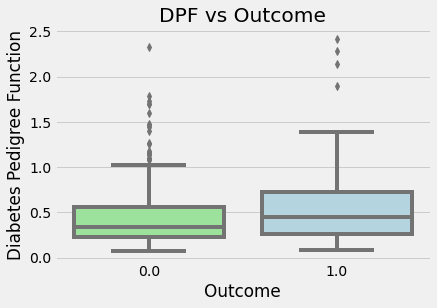

In [66]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'Diabetes Pedigree Function', data = df, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

Quite a proportion of people having high DPF does not end up having Diabetes. But usually the diabetic people have DPF value close to 0.5 (50th Percentile)

### Gluscose Level

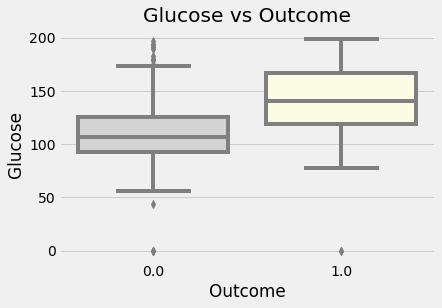

In [67]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

Wow! the median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.

### Insulin

Let's first check whether there is any relation between glucose and insulin level.

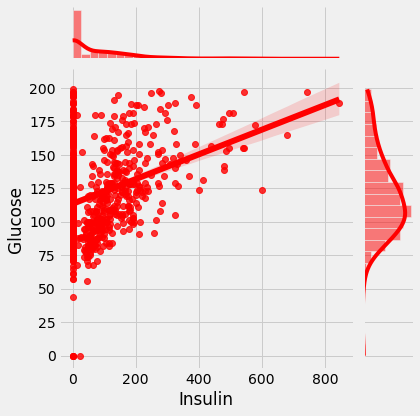

In [68]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind = 'reg', color = 'red')
plt.show()

We can see that as the insulin level increases, the Glucose level also increases.

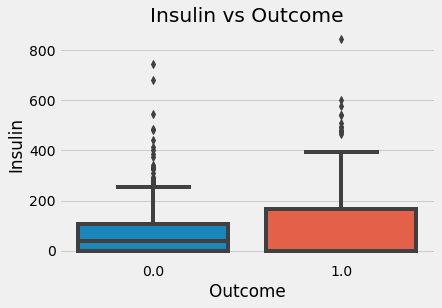

In [69]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.title('Insulin vs Outcome')
plt.show()

### Body Mass Index

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. Does having a higher BMI leads to more chances of being diabetic? Let's check that out!

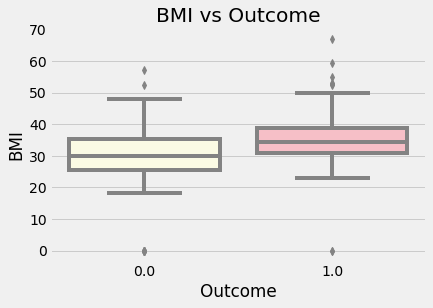

In [70]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

Indeed, the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.

### Correlation Matrix

<AxesSubplot:>

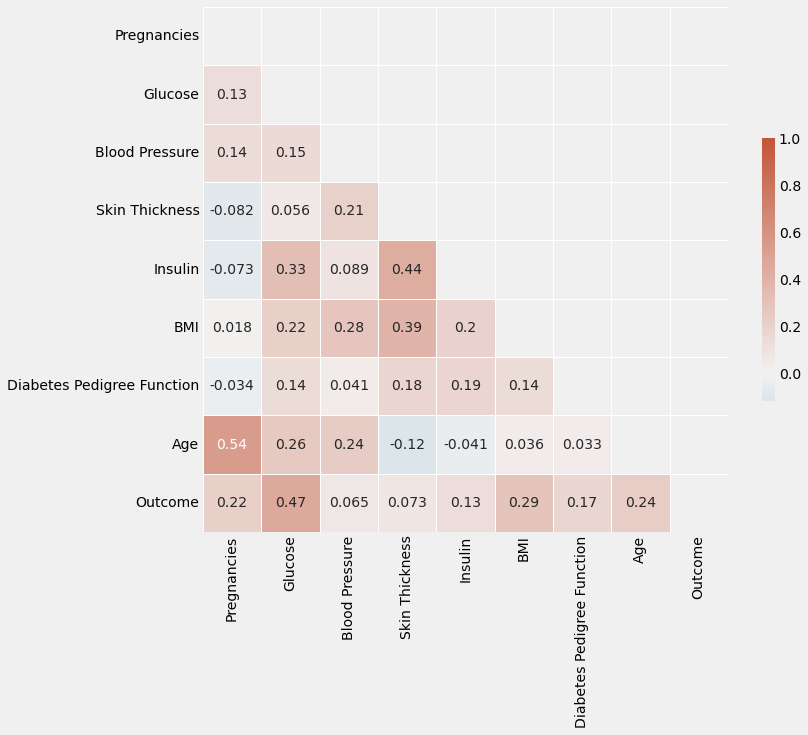

In [71]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

From the above heatmap, we can observe that all the features are weakly correlated, so that removes multicollinearity out of equation. Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. Models like Logistic Regression assumes the presence of non-collinearity among the features, if multicollinearity is present it can lead to the bad performance of such models.

### Feature Engineering

Now, its time to add important features to the dataset discover some effective features before fitting it into machine learning models.

Feature 1 : BMI Descriptor I m adding BMI Descriptor feature as we know : If you have a BMI of:

Under 18.5 – you are considered underweight and possibly malnourished.
18.5 to 24.9 – you are within a healthy weight range for young and middle-aged adults.
25.0 to 29.9 – you are considered overweight.
Over 30 – you are considered obese.

In [72]:
def set_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

In [73]:
df = df.assign(BM_DESC=df.apply(set_bmi, axis=1))

df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome,BM_DESC
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Over
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Healthy
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Over
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Obese
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,Over


Feature 2: Insulin Indicative Range If insulin level (2-Hour serum insulin (mu U/ml)) is >= 16 and <= 166, then it is normal range else it is considered as Abnormal

In [74]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [75]:
df = df.assign(INSULIN_DESC=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome,BM_DESC,INSULIN_DESC
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,Over,Abnormal
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,Healthy,Abnormal
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Over,Normal
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Obese,Abnormal
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,Over,Abnormal


Number of patients Having Abnormal Insulin Levels:  507
Number of patients Having Normal Insulin Levels:  260


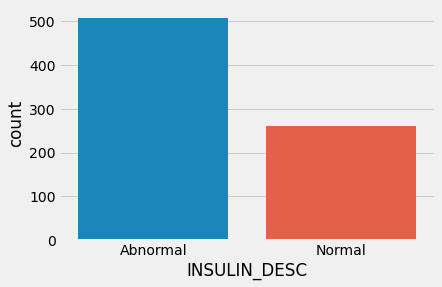

In [76]:
sns.countplot(data=df, x = 'INSULIN_DESC', label='Count')

AB, NB = df['INSULIN_DESC'].value_counts()
print('Number of patients Having Abnormal Insulin Levels: ',AB)
print('Number of patients Having Normal Insulin Levels: ',NB)

It seems from the above plot that more than 500 patients have Abnormal Insulin Levels where as around 250 patients have Normal Insulin Levels.

Number of patients Having Underweight BMI Index:  471
Number of patients Having Healthy BMI Index:  179
Number of patients Having Overweigth BMI Index:  102
Number of patients Having Obese BMI Index:  15


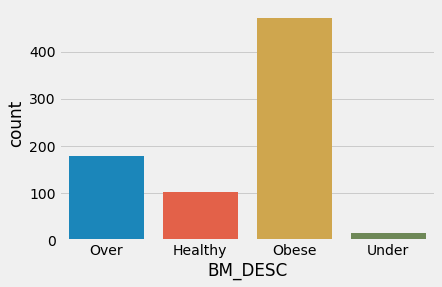

In [77]:
sns.countplot(data=df, x = 'BM_DESC', label='Count')

UD,H,OV,OB = df['BM_DESC'].value_counts()
print('Number of patients Having Underweight BMI Index: ',UD)
print('Number of patients Having Healthy BMI Index: ',H)
print('Number of patients Having Overweigth BMI Index: ',OV)
print('Number of patients Having Obese BMI Index: ',OB)

Show the plot Obese is higher then over, Healthy and under.

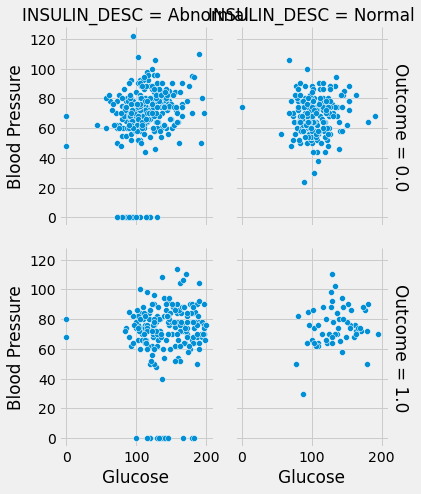

In [79]:
g = sns.FacetGrid(df, col="INSULIN_DESC", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Glucose", "Blood Pressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)

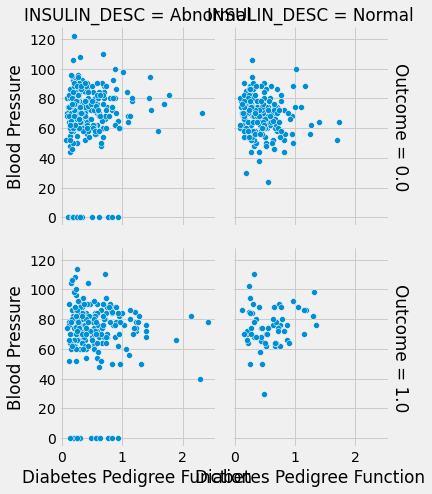

In [82]:
g = sns.FacetGrid(df, col="INSULIN_DESC", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Diabetes Pedigree Function", "Blood Pressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)

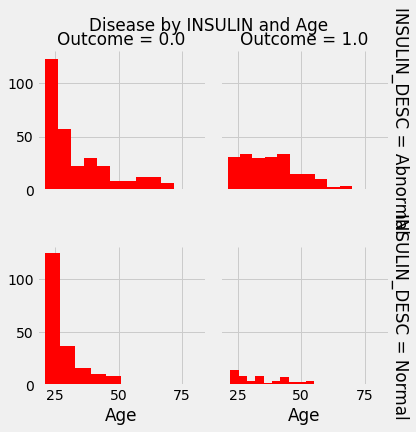

In [83]:
g = sns.FacetGrid(df, col="Outcome", row="INSULIN_DESC", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by INSULIN and Age');

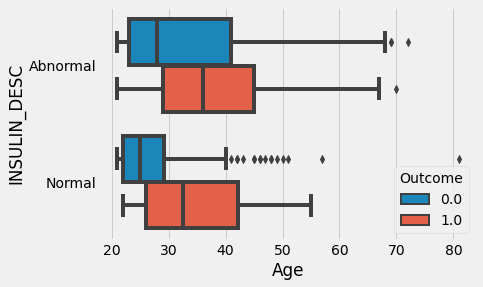

In [84]:
sns.boxplot(x="Age", y="INSULIN_DESC", hue="Outcome", data=df);

It seems from the above plot that patients having normal insulin levels are more diabetic within the age range from 25 and 42 where as patients having anormal insulin levels are more diabetic in the age range of late 20's to mid 40's.

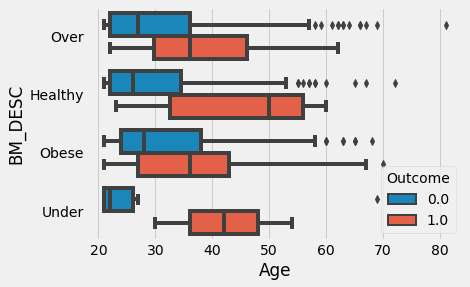

In [85]:
sns.boxplot(x="Age", y="BM_DESC", hue="Outcome", data=df);

From the above plot it is evident that patients who are obese as per BMI index are more diabetic in early age of 25 where as patients who are overweight are prone to diabetes in early 30's

### Conclusion

Diabetes is a heterogeneous group of diseases. It’s characterized by chronic elevation of glucose in the blood. The main motto of the American diabetes association [46] is “To prevent and cure diabetes and to improve the lives of all people affected by diabetes”. To support the lives of the people all over the world, we are trying to detect and prevent the complications of diabetes at the early stage through predictive analysis by improving the classification techniques.